### Neural Network and Deep Learning
### Lab 4
-----
### Jerin Mathew
### 2139455
-----

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("fashion-mnist_train.csv")

##### About the Data Set:

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top\
1 Trouser\
2 Pullover\
3 Dress\
4 Coat\
5 Sandal\
6 Shirt\
7 Sneaker\
8 Bag\
9 Ankle boot



In [18]:
data.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Spliting of data

In [19]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting 
#Development data
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.
# Train data
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [20]:
Y_train

array([8, 0, 0, ..., 5, 5, 5])

Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$


#####  Defining all required functions for MPN:

#### Here we have 784 columns and 2 hidden layers with 10 neurons in each hidden layer.

In [76]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y



def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

##### Defining the Algorithm

In [55]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, alpha, iterations):
    #global a
    a=[]
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            A=get_accuracy(predictions, Y)
            print(get_accuracy(predictions, Y))
            a.append(A)
    return W1, b1, W2, b2,a

##### Output of the Model

In [56]:
W1, b1, W2, b2,a = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 7 7 ... 8 9 9] [8 0 0 ... 5 5 5]
[7 7 7 ... 8 9 9] [8 0 0 ... 5 5 5]
0.06940677966101695
Iteration:  10
[8 6 4 ... 8 9 9] [8 0 0 ... 5 5 5]
[8 6 4 ... 8 9 9] [8 0 0 ... 5 5 5]
0.2611864406779661
Iteration:  20
[8 3 3 ... 9 9 5] [8 0 0 ... 5 5 5]
[8 3 3 ... 9 9 5] [8 0 0 ... 5 5 5]
0.4067796610169492
Iteration:  30
[8 3 3 ... 9 9 5] [8 0 0 ... 5 5 5]
[8 3 3 ... 9 9 5] [8 0 0 ... 5 5 5]
0.4971186440677966
Iteration:  40
[8 6 3 ... 9 5 5] [8 0 0 ... 5 5 5]
[8 6 3 ... 9 5 5] [8 0 0 ... 5 5 5]
0.5514237288135593
Iteration:  50
[8 6 3 ... 9 5 5] [8 0 0 ... 5 5 5]
[8 6 3 ... 9 5 5] [8 0 0 ... 5 5 5]
0.5838813559322034
Iteration:  60
[8 6 3 ... 9 5 5] [8 0 0 ... 5 5 5]
[8 6 3 ... 9 5 5] [8 0 0 ... 5 5 5]
0.605864406779661
Iteration:  70
[8 6 3 ... 9 5 5] [8 0 0 ... 5 5 5]
[8 6 3 ... 9 5 5] [8 0 0 ... 5 5 5]
0.623406779661017
Iteration:  80
[8 6 3 ... 9 5 5] [8 0 0 ... 5 5 5]
[8 6 3 ... 9 5 5] [8 0 0 ... 5 5 5]
0.6365084745762711
Iteration:  90
[8 6 3 ... 9 5 5] [8 0 0 ... 5 5 

##### Plotting of the Accuracy of the traing Model

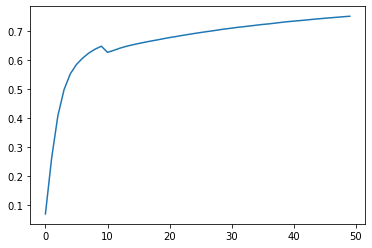

In [57]:
plt.plot(a)

**The accuracy of the model at learning rate of 0.1, for 500 intirations with 2 hidden layers of 10 neurons each is 74.98**

In [24]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

###### Validating the model:

Prediction:  [8]
Label:  8


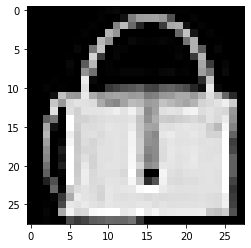

Prediction:  [0]
Label:  0


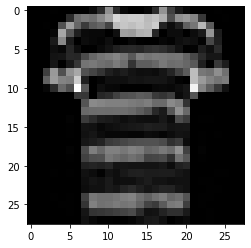

Prediction:  [0]
Label:  0


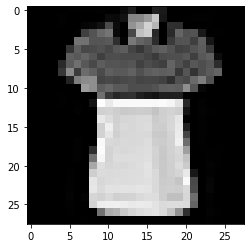

Prediction:  [4]
Label:  6


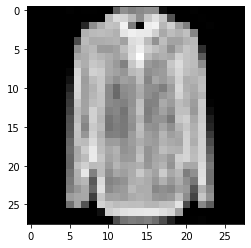

In [25]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

##### Accuracy of the model on Development data 

In [26]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)

get_accuracy(dev_predictions, Y_dev)

[0 6 6 9 1 3 7 2 2 9 1 0 6 2 0 3 1 0 2 9 7 2 6 4 2 8 5 2 8 9 2 9 5 2 4 7 9
 7 2 2 2 7 8 2 2 4 9 9 9 9 7 8 9 2 5 2 8 7 1 9 0 9 9 0 7 2 6 4 2 8 2 0 5 7
 7 1 8 2 3 4 0 9 0 8 2 1 2 2 4 3 1 1 1 1 1 4 2 0 3 2 8 7 2 7 9 8 0 6 3 0 0
 2 7 5 7 3 3 0 9 4 7 4 1 6 1 9 0 1 2 6 1 5 0 5 6 8 2 7 3 8 8 8 5 2 0 5 8 2
 3 9 2 6 9 4 3 4 3 7 9 2 3 3 1 9 1 1 2 2 7 8 2 1 3 9 7 0 1 6 2 2 9 8 3 9 3
 0 2 6 0 2 4 2 2 3 7 8 5 7 2 3 3 2 8 3 7 5 5 3 9 4 5 2 2 4 6 5 2 4 0 2 7 7
 7 2 4 7 3 7 3 8 3 8 4 7 9 5 3 7 2 4 3 2 2 8 6 4 8 0 7 9 2 8 7 1 6 0 7 2 2
 8 0 7 5 8 6 2 5 5 5 1 8 5 0 5 8 2 3 2 2 4 4 7 6 2 1 4 6 2 2 0 0 7 1 8 2 1
 9 8 8 3 0 2 2 4 6 1 6 1 7 7 2 8 6 7 2 2 4 9 7 9 2 2 8 1 2 3 8 8 0 1 7 8 8
 5 8 8 2 1 0 2 2 4 7 6 1 1 0 4 5 7 2 3 3 1 4 9 9 0 4 7 9 4 6 9 1 3 3 2 3 0
 2 7 9 6 0 6 7 0 1 4 6 7 2 2 4 0 1 0 7 6 9 3 9 1 5 1 2 0 1 2 4 1 6 6 9 3 2
 6 8 4 5 8 2 3 1 4 3 2 0 2 3 8 0 3 7 2 5 0 5 7 3 0 7 1 1 1 2 3 1 2 8 7 2 0
 2 5 8 2 5 7 8 7 4 3 6 6 3 8 1 2 3 3 8 2 2 8 2 9 7 8 1 0 0 3 8 7 9 7 7 1 2
 7 0 5 9 8 7 0 2 5 1 8 1 

0.741

#### Still 74.1% accuracy, so our model generalized from the training data pretty well.

#### Q2

Observe the performance of Q1 model including one or more tasks from the given list:

Preprocessing the data set 

Using different activation function

Using different loss function

Different train/test split ratio

Tuning the learning rate

Modifying hyperparameter like number of hidden layers, number of nodes in each hidden layer, etc


In [59]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting 
#Development data
data_dev = data[0:1500].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.
# Train data
data_train = data[1500:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

#### Learning rate is 0.15 and 500 iterations

In [60]:
W1, b1, W2, b2,a = gradient_descent(X_train, Y_train, 0.15, 500)

Iteration:  0
[5 9 4 ... 4 5 5] [4 9 0 ... 0 2 3]
[5 9 4 ... 4 5 5] [4 9 0 ... 0 2 3]
0.0844957264957265
Iteration:  10
[8 9 3 ... 0 3 4] [4 9 0 ... 0 2 3]
[8 9 3 ... 0 3 4] [4 9 0 ... 0 2 3]
0.3237264957264957
Iteration:  20
[8 9 3 ... 3 4 3] [4 9 0 ... 0 2 3]
[8 9 3 ... 3 4 3] [4 9 0 ... 0 2 3]
0.4416239316239316
Iteration:  30
[8 9 3 ... 3 4 3] [4 9 0 ... 0 2 3]
[8 9 3 ... 3 4 3] [4 9 0 ... 0 2 3]
0.5106153846153846
Iteration:  40
[8 9 3 ... 3 4 3] [4 9 0 ... 0 2 3]
[8 9 3 ... 3 4 3] [4 9 0 ... 0 2 3]
0.5487179487179488
Iteration:  50
[8 9 0 ... 0 6 6] [4 9 0 ... 0 2 3]
[8 9 0 ... 0 6 6] [4 9 0 ... 0 2 3]
0.4963760683760684
Iteration:  60
[8 9 3 ... 0 6 3] [4 9 0 ... 0 2 3]
[8 9 3 ... 0 6 3] [4 9 0 ... 0 2 3]
0.5450940170940171
Iteration:  70
[8 9 3 ... 0 6 3] [4 9 0 ... 0 2 3]
[8 9 3 ... 0 6 3] [4 9 0 ... 0 2 3]
0.5788888888888889
Iteration:  80
[2 9 3 ... 0 6 3] [4 9 0 ... 0 2 3]
[2 9 3 ... 0 6 3] [4 9 0 ... 0 2 3]
0.5992820512820513
Iteration:  90
[2 9 3 ... 0 6 3] [4 9 0 ... 0 2

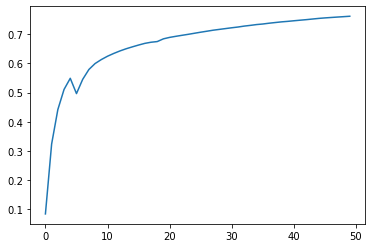

In [61]:
plt.plot(a)

##### Accuracy of the model at 0.15 learning rate and 500 iterations is 76.11%. There is a slight increase in the accuracy with increase of learning rate for the same model mentioned earlier. 

##### Same architecture with learning rate of 0.25 and 300 Iterations. 

In [77]:
W1, b1, W2, b2,a = gradient_descent(X_train, Y_train, 0.25, 300)

Iteration:  0
[4 4 4 ... 4 4 4] [4 9 0 ... 0 2 3]
[4 4 4 ... 4 4 4] [4 9 0 ... 0 2 3]
0.12273504273504274
Iteration:  10
[3 9 1 ... 3 1 1] [4 9 0 ... 0 2 3]
[3 9 1 ... 3 1 1] [4 9 0 ... 0 2 3]
0.26545299145299145
Iteration:  20
[3 9 4 ... 2 1 1] [4 9 0 ... 0 2 3]
[3 9 4 ... 2 1 1] [4 9 0 ... 0 2 3]
0.4205982905982906
Iteration:  30
[6 9 4 ... 2 2 2] [4 9 0 ... 0 2 3]
[6 9 4 ... 2 2 2] [4 9 0 ... 0 2 3]
0.5247521367521367
Iteration:  40
[6 9 4 ... 3 4 4] [4 9 0 ... 0 2 3]
[6 9 4 ... 3 4 4] [4 9 0 ... 0 2 3]
0.46403418803418806
Iteration:  50
[6 9 3 ... 3 2 2] [4 9 0 ... 0 2 3]
[6 9 3 ... 3 2 2] [4 9 0 ... 0 2 3]
0.5343931623931624
Iteration:  60
[6 9 3 ... 3 2 2] [4 9 0 ... 0 2 3]
[6 9 3 ... 3 2 2] [4 9 0 ... 0 2 3]
0.5685811965811965
Iteration:  70
[6 9 3 ... 3 2 6] [4 9 0 ... 0 2 3]
[6 9 3 ... 3 2 6] [4 9 0 ... 0 2 3]
0.596017094017094
Iteration:  80
[6 9 3 ... 3 2 6] [4 9 0 ... 0 2 3]
[6 9 3 ... 3 2 6] [4 9 0 ... 0 2 3]
0.6188376068376068
Iteration:  90
[6 9 0 ... 0 2 0] [4 9 0 ... 0

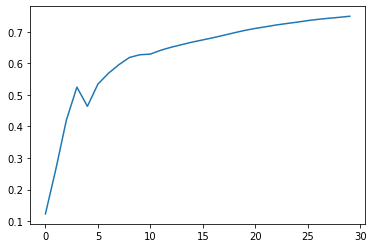

In [78]:
plt.plot(a)

##### The accuracy of the model remains almost same with less number of iterations and increased learning rate. The accuracy of the model at 0.25 leaning rate and 300 epohs is 74.96

In [79]:
W1, b1, W2, b2,a = gradient_descent(X_train, Y_train, 0.25, 500)

Iteration:  0
[3 0 3 ... 3 3 3] [4 9 0 ... 0 2 3]
[3 0 3 ... 3 3 3] [4 9 0 ... 0 2 3]
0.14435897435897435
Iteration:  10
[2 9 1 ... 8 2 3] [4 9 0 ... 0 2 3]
[2 9 1 ... 8 2 3] [4 9 0 ... 0 2 3]
0.4287179487179487
Iteration:  20
[2 9 3 ... 0 2 3] [4 9 0 ... 0 2 3]
[2 9 3 ... 0 2 3] [4 9 0 ... 0 2 3]
0.5462222222222223
Iteration:  30
[8 9 3 ... 8 6 0] [4 9 0 ... 0 2 3]
[8 9 3 ... 8 6 0] [4 9 0 ... 0 2 3]
0.5207350427350428
Iteration:  40
[6 9 3 ... 0 4 3] [4 9 0 ... 0 2 3]
[6 9 3 ... 0 4 3] [4 9 0 ... 0 2 3]
0.5851623931623932
Iteration:  50
[6 9 3 ... 0 4 3] [4 9 0 ... 0 2 3]
[6 9 3 ... 0 4 3] [4 9 0 ... 0 2 3]
0.6100341880341881
Iteration:  60
[6 9 3 ... 0 4 3] [4 9 0 ... 0 2 3]
[6 9 3 ... 0 4 3] [4 9 0 ... 0 2 3]
0.6307692307692307
Iteration:  70
[6 9 3 ... 0 4 3] [4 9 0 ... 0 2 3]
[6 9 3 ... 0 4 3] [4 9 0 ... 0 2 3]
0.6483418803418803
Iteration:  80
[6 9 3 ... 0 4 3] [4 9 0 ... 0 2 3]
[6 9 3 ... 0 4 3] [4 9 0 ... 0 2 3]
0.6607692307692308
Iteration:  90
[6 9 3 ... 0 4 3] [4 9 0 ... 0 

###### For this model with same learning rate with increased iterations results in increase of accuracy. The accuracy reaches to 80% at 0.25 learning rate and for 500 iterations for the above architecture. 

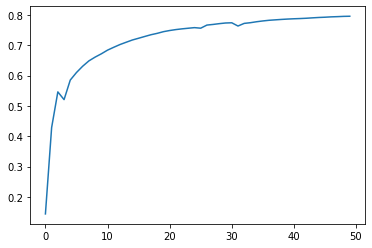

In [80]:
plt.plot(a)

Prediction:  [6]
Label:  4


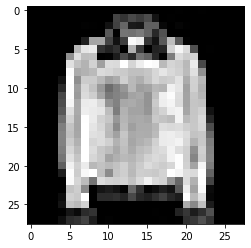

Prediction:  [9]
Label:  9


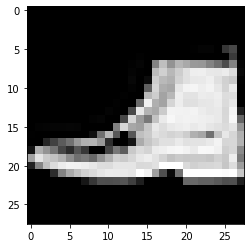

Prediction:  [6]
Label:  0


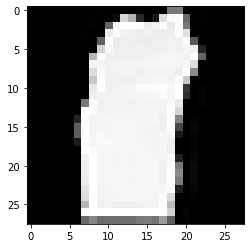

Prediction:  [9]
Label:  9


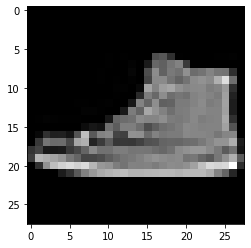

In [81]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [82]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)

get_accuracy(dev_predictions, Y_dev)

[0 4 2 ... 3 0 2] [6 2 2 ... 3 0 2]


0.7973333333333333

#### Here we have 784 columns and 2 hidden layers with 15 neurons in one hidden layer and 10 neurons in second hidden layer. 

In [99]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting 
#Development data
data_dev = data[0:2000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.
# Train data
data_train = data[2000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [103]:
def init_params():
    W1 = np.random.rand(15, 784) - 0.5
    b1 = np.random.rand(15, 1) - 0.5
    W2 = np.random.rand(10, 15) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y



def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [101]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, alpha, iterations):
    #global a
    a=[]
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            A=get_accuracy(predictions, Y)
            print(get_accuracy(predictions, Y))
            a.append(A)
    return W1, b1, W2, b2,a

In [104]:
W1, b1, W2, b2,a = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 8 3 ... 3 3 4] [9 5 6 ... 8 3 2]
[3 8 3 ... 3 3 4] [9 5 6 ... 8 3 2]
0.1349655172413793
Iteration:  10
[0 8 0 ... 3 3 2] [9 5 6 ... 8 3 2]
[0 8 0 ... 3 3 2] [9 5 6 ... 8 3 2]
0.3565
Iteration:  20
[9 9 0 ... 3 3 2] [9 5 6 ... 8 3 2]
[9 9 0 ... 3 3 2] [9 5 6 ... 8 3 2]
0.4869655172413793
Iteration:  30
[5 9 0 ... 3 3 2] [9 5 6 ... 8 3 2]
[5 9 0 ... 3 3 2] [9 5 6 ... 8 3 2]
0.5427758620689656
Iteration:  40
[5 5 0 ... 3 3 2] [9 5 6 ... 8 3 2]
[5 5 0 ... 3 3 2] [9 5 6 ... 8 3 2]
0.5739137931034483
Iteration:  50
[5 5 0 ... 3 3 2] [9 5 6 ... 8 3 2]
[5 5 0 ... 3 3 2] [9 5 6 ... 8 3 2]
0.5954310344827586
Iteration:  60
[5 5 0 ... 3 3 2] [9 5 6 ... 8 3 2]
[5 5 0 ... 3 3 2] [9 5 6 ... 8 3 2]
0.6106206896551725
Iteration:  70
[9 5 0 ... 3 3 2] [9 5 6 ... 8 3 2]
[9 5 0 ... 3 3 2] [9 5 6 ... 8 3 2]
0.6235172413793103
Iteration:  80
[9 5 0 ... 3 3 2] [9 5 6 ... 8 3 2]
[9 5 0 ... 3 3 2] [9 5 6 ... 8 3 2]
0.6339137931034483
Iteration:  90
[9 5 0 ... 3 3 2] [9 5 6 ... 8 3 2]
[9 5 0 .

**The accuracy of the model at learning rate of 0.1, for 500 intirations with 2 hidden layers of 15 neurons in first hidden layer and 10 in second layer is 75.78. With increase in neurons in the fisrt layer increase the accuracy by 1%. With increase in learning rate, neurons in hidden layers, iterations results in increase of accuracy.**